# Business Problem

The company has over 2,500 employees with diverse backgrounds, departments, and performance levels.  
However, HR currently evaluates employees primarily through **individual metrics** such as income, overtime hours, or performance scores, without a structured way to identify **patterns across the workforce**.  

This creates several challenges:
- **Retention Risk:** High-performing employees (especially younger staff) may leave if their contributions are not recognized and rewarded properly.  
- **Performance Gaps:** Some employee groups show weaker performance but still consume resources (bonuses, overtime pay) without clear improvement strategies.  
- **Compensation Misalignment:** Bonus distribution and salary levels may not reflect actual performance or effort, creating fairness issues.  
- **Overtime Imbalance:** Certain groups work significantly more overtime, which can lead to burnout and long-term productivity loss.  

Without deeper insights, HR policies are applied uniformly, potentially overlooking the **unique needs of different employee segments**.

---

# Business Goal

Segment employees into **distinct clusters** based on their demographic, work, and performance characteristics.  
This will enable the company to:
- Identify **high performers** and design tailored retention strategies.  
- Detect **at-risk groups** (overworked, underperforming, or disengaged employees).  
- Align **bonuses and compensation** with actual employee contribution.  
- Develop **targeted training and career development programs**.  

By leveraging data-driven segmentation, HR can move from a **one-size-fits-all approach** to a **personalized workforce management strategy**, improving both employee satisfaction and organizational efficiency.


# Feature Information

- **employee_id** : Unique employee ID  
- **age** : Employee’s age  
- **gender** : Gender  
- **marital_status** : Marital status  
- **city** : City of employment  
- **education_level** : Highest education level attained  
- **years_experience** : Total years of work experience  
- **weekly_hours** : Average working hours per week  
- **department** : Department of employment  
- **bonus_percentage** : Annual bonus percentage  
- **performance_score** : Performance evaluation score  
- **overtime_hours** : Monthly overtime hours  
- **monthly_income** : Monthly income   
- **income_class** : Income class   


# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math
import plotly.express as px
import folium
from folium.plugins import MarkerCluster

from sklearn.datasets import load_wine
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

# Read CSV

In [2]:
# Define google sheets URL
sheet_url = 'https://docs.google.com/spreadsheets/d/177dhc-pW7i1o5kk-1px7Zf3lN4n97GO4CNlPcvWZdsY/edit?gid=1333516541#gid=1333516541'

# Transform google sheets into CSV
sheet_url_csv = sheet_url.replace('/edit?gid=', '/export?format=csv&gid=').replace('/edit#gid=', '/export?format=csv&gid=')

# Transform csv to df
df = pd.read_csv(sheet_url_csv)

# Check DataFrame Information

In [3]:
df.tail()

,Unnamed: 0,employee_id,age,gender,marital_status,city,education_level,years_experience,weekly_hours,department,bonus_percentage,performance_score,overtime_hours,monthly_income,income_class
3025,3025,2896,66.0,Female,Married,Surabaya,S1,19.0,42.0,Sales,NaN,68.9,3.7,12508,High
3026,3026,2604,115.0,Female,Married,Surabaya,S1,11.0,46.9,Marketing,NaN,68.0,16.4,11653,High
3027,3027,1227,35.0,Male,Married,Jakarta,SMA,7.0,36.4,NaN,4.8,74.1,13.5,4435,Low
3028,3028,297,42.0,Female,Married,Surabaya,S1,14.0,36.7,Sales,NaN,70.0,7.0,10685,High
3029,3029,1242,33.0,Female,Single,Bandung,SMA,5.0,33.2,Sales,10.4,50.4,14.5,6176,Low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3030 entries, 0 to 3029
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3030 non-null   int64  
 1   employee_id        3030 non-null   int64  
 2   age                2843 non-null   float64
 3   gender             3030 non-null   object 
 4   marital_status     3030 non-null   object 
 5   city               3030 non-null   object 
 6   education_level    3030 non-null   object 
 7   years_experience   2894 non-null   float64
 8   weekly_hours       2872 non-null   float64
 9   department         2878 non-null   object 
 10  bonus_percentage   1819 non-null   float64
 11  performance_score  3030 non-null   float64
 12  overtime_hours     2789 non-null   float64
 13  monthly_income     3030 non-null   int64  
 14  income_class       3030 non-null   object 
dtypes: float64(6), int64(3), object(6)
memory usage: 355.2+ KB


# New section

In [5]:
df.describe(include='all')

,Unnamed: 0,employee_id,age,gender,marital_status,city,education_level,years_experience,weekly_hours,department,bonus_percentage,performance_score,overtime_hours,monthly_income,income_class
count,3030.000000,3030.000000,2843.000000,3030,3030,3030,3030,2894.000000,2872.000000,2878,1819.000000,3030.000000,2789.000000,3030.000000,3030
unique,NaN,NaN,NaN,3,3,3,4,NaN,NaN,5,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,Female,Married,Surabaya,S1,NaN,NaN,Finance,NaN,NaN,NaN,NaN,High
freq,NaN,NaN,NaN,1485,1472,1046,1164,NaN,NaN,596,NaN,NaN,NaN,NaN,1519
mean,1514.500000,1499.963366,35.645445,NaN,NaN,NaN,NaN,10.096752,40.202542,NaN,9.911765,75.098086,10.000574,9404.676568,NaN
std,874.829983,866.474895,11.301053,NaN,NaN,NaN,NaN,4.845805,6.430485,NaN,3.002598,10.524693,4.967633,6006.600245,NaN
min,0.000000,1.000000,-10.000000,NaN,NaN,NaN,NaN,0.000000,23.100000,NaN,-1.600000,39.700000,0.000000,878.000000,NaN
25%,757.250000,750.250000,30.000000,NaN,NaN,NaN,NaN,7.000000,36.700000,NaN,7.900000,68.300000,6.300000,7237.750000,NaN
50%,1514.500000,1498.500000,35.000000,NaN,NaN,NaN,NaN,10.000000,40.000000,NaN,9.900000,74.900000,9.800000,9094.000000,NaN
75%,2271.750000,2250.750000,41.000000,NaN,NaN,NaN,NaN,13.000000,43.300000,NaN,12.100000,82.000000,13.400000,10949.500000,NaN


# Data Preprocessing

## Remove irrelevant columns

In [6]:
df = df.drop(columns=['Unnamed: 0'])

## Drop duplicates

In [7]:
df.duplicated().sum()

np.int64(30)

In [8]:
df = df.drop_duplicates()

## Null handling


In [9]:
df.isna().sum()

,0
employee_id,0
age,187
gender,0
marital_status,0
city,0
education_level,0
years_experience,135
weekly_hours,155
department,150
bonus_percentage,1200


## Null handling rationale

To ensure data quality before clustering, different strategies are applied depending on the feature type and its business meaning:

---

## 1. Fill with 0
- **bonus_percentage** → If missing, assume no bonus is given.  
- **overtime_hours** → If missing, assume no overtime is recorded.  

**Rationale:** Zero is a meaningful default for these features because “absence” of bonus or overtime is valid and does not distort the dataset.

---

## 2. Drop NA
- **years_experience**  
- **weekly_hours**  
- **age**  

**Rationale:** These features are fundamental demographic or work-related variables. Missing values here may indicate incomplete employee records, and imputing them could introduce bias. Dropping rows with missing values preserves data integrity for clustering.

---

## 3. Fill with Special Values
- **department** → Missing values are imputed with 'other'.  

**Rationale:** Department is a categorical feature. Filling with zero or dropping rows would lose useful employee records. Using a special label keeps the data while flagging that department information is not available.

### Fill with 0

#### `bonus_percentage`

In [10]:
df['bonus_percentage'] = df['bonus_percentage'].fillna(0)

#### `overtime_hours`

In [11]:
df['overtime_hours'] = df['overtime_hours'].fillna(0)

### Drop NA

#### `years_experience`

In [12]:
df_no_exp = df[df['years_experience'].isna()]
df_no_exp.head()

,employee_id,age,gender,marital_status,city,education_level,years_experience,weekly_hours,department,bonus_percentage,performance_score,overtime_hours,monthly_income,income_class
12,13,37.0,Other,Married,Surabaya,D3,NaN,42.4,Sales,0.0,68.7,1.0,14143,High
17,18,38.0,Female,Single,Bandung,S1,NaN,48.9,IT,8.7,72.3,18.3,10391,High
40,41,41.0,Male,Married,Bandung,D3,NaN,35.2,NaN,0.0,80.8,14.0,8010,Low
44,45,23.0,Female,Married,Bandung,S1,NaN,37.8,IT,0.0,75.3,15.9,9271,High
50,51,38.0,Male,Single,Bandung,S1,NaN,43.4,Marketing,0.0,91.5,0.0,16112,High


In [13]:
for col in df_no_exp.columns:
    print(f"--- {col} ---")
    print(df_no_exp[col].value_counts())
    print()

--- employee_id ---
employee_id
13      1
18      1
41      1
45      1
51      1
       ..
2974    1
2978    1
2979    1
2986    1
2989    1
Name: count, Length: 135, dtype: int64

--- age ---
age
 39.0    10
 38.0     9
 32.0     8
 35.0     6
 30.0     6
 33.0     6
 28.0     6
 43.0     5
 37.0     5
 41.0     4
 25.0     4
 23.0     4
 36.0     4
 34.0     4
 26.0     4
 42.0     4
 46.0     3
 27.0     3
 31.0     3
 49.0     3
 29.0     2
 40.0     2
 44.0     2
 47.0     2
 20.0     2
 45.0     2
 98.0     1
 24.0     1
 50.0     1
 21.0     1
 16.0     1
-1.0      1
 19.0     1
 91.0     1
 22.0     1
 56.0     1
 15.0     1
 51.0     1
Name: count, dtype: int64

--- gender ---
gender
Female    66
Male      65
Other      4
Name: count, dtype: int64

--- marital_status ---
marital_status
Married     69
Single      53
Divorced    13
Name: count, dtype: int64

--- city ---
city
Jakarta     47
Bandung     46
Surabaya    42
Name: count, dtype: int64

--- education_level ---
educati

**Insights:**

No patterns are found in the missing data. Null handling will be done as stated in the previous rationale

In [14]:
df = df.dropna(subset=['years_experience'])

#### `weekly_hours`

In [15]:
df_no_weekly_hours = df[df['weekly_hours'].isna()]
df_no_weekly_hours.head()

,employee_id,age,gender,marital_status,city,education_level,years_experience,weekly_hours,department,bonus_percentage,performance_score,overtime_hours,monthly_income,income_class
54,55,43.0,Male,Married,Surabaya,S1,9.0,NaN,Finance,13.3,85.2,4.1,8526,Low
93,94,32.0,Male,Single,Jakarta,S1,17.0,NaN,HR,10.6,70.3,7.8,10202,High
97,98,37.0,Male,Single,Surabaya,S2,2.0,NaN,Sales,8.9,68.6,10.4,5278,Low
149,150,37.0,Male,Married,Surabaya,S1,11.0,NaN,IT,10.3,76.8,4.0,9745,High
156,157,50.0,Male,Single,Jakarta,SMA,14.0,NaN,NaN,12.0,81.6,12.2,9785,High


In [16]:
for col in df_no_weekly_hours.columns:
    print(f"--- {col} ---")
    print(df_no_weekly_hours[col].value_counts())
    print()

--- employee_id ---
employee_id
55      1
94      1
98      1
150     1
157     1
       ..
2907    1
2920    1
2947    1
2949    1
2976    1
Name: count, Length: 148, dtype: int64

--- age ---
age
33.0    15
41.0    13
36.0     9
40.0     6
30.0     6
32.0     6
43.0     5
45.0     5
28.0     5
31.0     5
42.0     5
39.0     5
37.0     4
27.0     4
26.0     4
24.0     4
48.0     3
34.0     3
20.0     3
44.0     3
21.0     3
35.0     3
47.0     2
17.0     2
52.0     2
49.0     2
29.0     2
23.0     2
38.0     2
25.0     1
50.0     1
46.0     1
53.0     1
11.0     1
14.0     1
Name: count, dtype: int64

--- gender ---
gender
Female    80
Male      60
Other      8
Name: count, dtype: int64

--- marital_status ---
marital_status
Married     70
Single      63
Divorced    15
Name: count, dtype: int64

--- city ---
city
Jakarta     57
Bandung     47
Surabaya    44
Name: count, dtype: int64

--- education_level ---
education_level
SMA    57
S1     50
D3     30
S2     11
Name: count, dtype: in

**Insights:**

No patterns are found in the missing data. Null handling will be done as stated in the previous rationale

In [17]:
df = df.dropna(subset=['weekly_hours'])

#### `age`

In [18]:
df = df.dropna(subset=['age'])

### Fill with special values

#### `department`

In [19]:
df['department'] = df['department'].fillna('other')

## Outlier handling

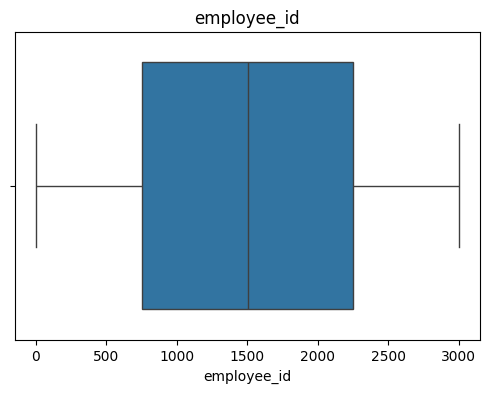

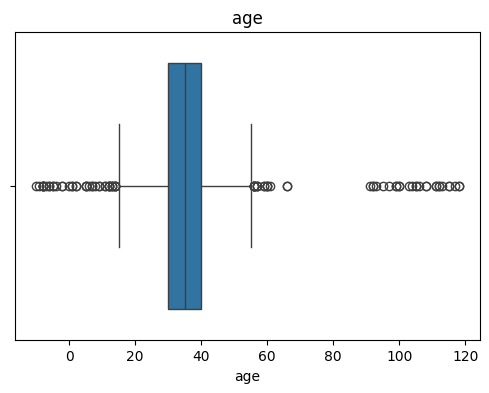

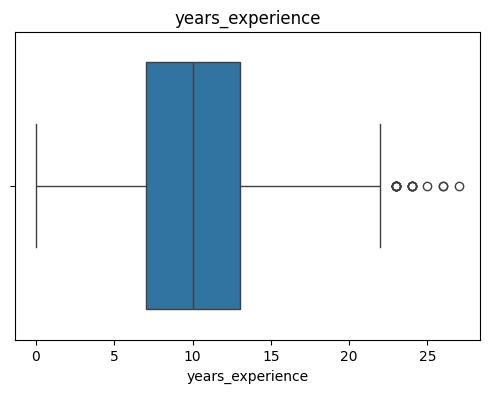

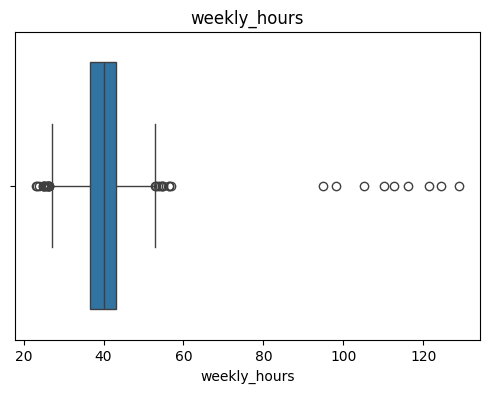

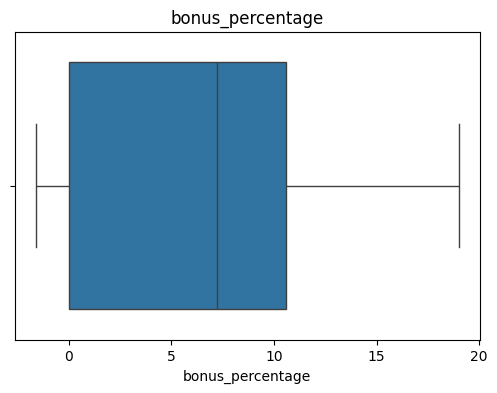

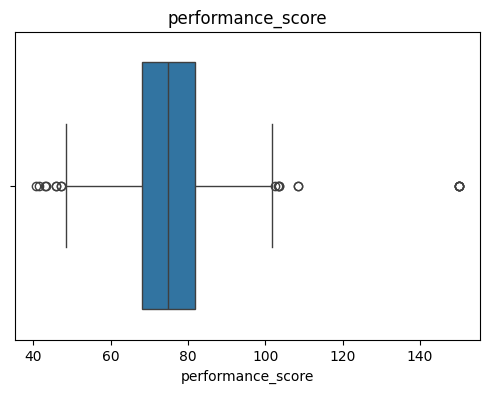

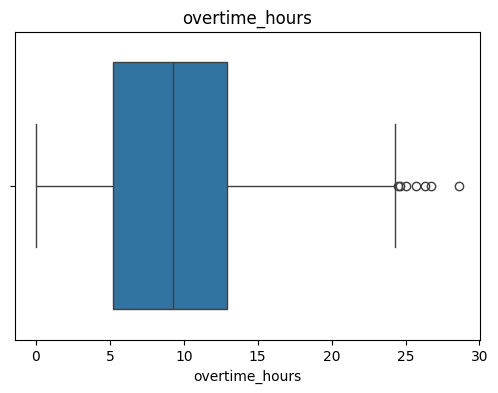

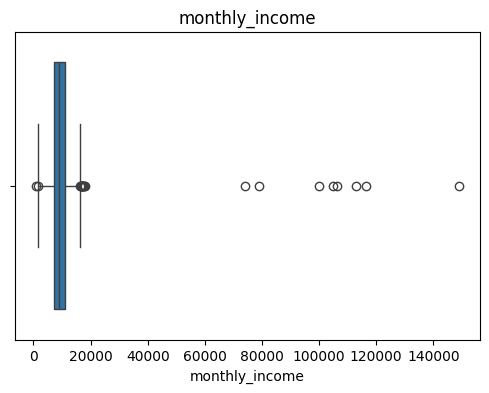

In [20]:
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

## Outlier handling rationale

## 1. Null Handling
- **Age**  
  - Employees must be within a realistic working age range (18–70).  
  - Records outside this range are removed.  

- **Weekly Hours**  
  - Employees working **≥ 80 hours per week** are considered unrealistic.  
  - These records are filtered out to avoid distortion in clustering.  

---

## 2. Outlier Treatment for Other Numerical Columns
- **No outlier removal** is applied to:  
  - `monthly_income`  
  - `bonus_percentage`  
  - `overtime_hours`  
  - `performance_score`  
  - `years_experience`  

**Rationale:**  
- These features naturally vary in the real business world.  
- Differences in pay, performance, and workload reflect true employee diversity.  
- High values (e.g., senior executives or high performers) are meaningful and must be preserved.  


### `age`

In [21]:
df = df[(df['age'] >= 18) & (df['age'] <= 70)]

### `weekly_hours`

In [22]:
df_hard_working = df[df['weekly_hours'] >= 80]
df_hard_working.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 531 to 2389
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   employee_id        9 non-null      int64  
 1   age                9 non-null      float64
 2   gender             9 non-null      object 
 3   marital_status     9 non-null      object 
 4   city               9 non-null      object 
 5   education_level    9 non-null      object 
 6   years_experience   9 non-null      float64
 7   weekly_hours       9 non-null      float64
 8   department         9 non-null      object 
 9   bonus_percentage   9 non-null      float64
 10  performance_score  9 non-null      float64
 11  overtime_hours     9 non-null      float64
 12  monthly_income     9 non-null      int64  
 13  income_class       9 non-null      object 
dtypes: float64(6), int64(2), object(6)
memory usage: 1.1+ KB


In [23]:
df = df[df['weekly_hours'] < 80]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2459 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   employee_id        2459 non-null   int64  
 1   age                2459 non-null   float64
 2   gender             2459 non-null   object 
 3   marital_status     2459 non-null   object 
 4   city               2459 non-null   object 
 5   education_level    2459 non-null   object 
 6   years_experience   2459 non-null   float64
 7   weekly_hours       2459 non-null   float64
 8   department         2459 non-null   object 
 9   bonus_percentage   2459 non-null   float64
 10  performance_score  2459 non-null   float64
 11  overtime_hours     2459 non-null   float64
 12  monthly_income     2459 non-null   int64  
 13  income_class       2459 non-null   object 
dtypes: float64(6), int64(2), object(6)
memory usage: 288.2+ KB


# Column Transformer

In [25]:
# Check values for ordinal encoding
df['education_level'].value_counts()

,count
education_level,
S1,967
SMA,752
D3,504
S2,236


In [26]:
# Check values for ordinal encoding
df['income_class'].value_counts()

,count
income_class,
Low,1250
High,1209


In [27]:
# Column groups
num_cols = [
    'age',
    'years_experience',
    'weekly_hours',
    'bonus_percentage',
    'performance_score',
    'overtime_hours'
]

cat_cols = [
    'gender',
    'marital_status',
    'city',
    'department'
]

ord_cols = [
    'education_level'
]

# Numerical pipeline (RobustScaler because of outliers)
num_pipeline = Pipeline(steps=[
    ('scaler', RobustScaler())
])

# Categorical (nominal) pipeline
cat_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Ordinal pipeline for education_level
ord_pipeline = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[
        ['SMA', 'D3', 'S1', 'S2'], #education_level
    ]))
])

# Combine everything
ct = ColumnTransformer(transformers=[
    ('num', num_pipeline, num_cols),   # numeric
    ('cat', cat_pipeline, cat_cols),   # nominal categorical
    ('ord', ord_pipeline, ord_cols)    # ordinal categorical
])


# PCA

In [28]:
# PCA pipeline
pca_pipeline = Pipeline(steps=[
    ('ColumnTransformer', ct),
    ('pca', PCA(n_components=15))      # reduce to 2D for visualization
])


In [29]:
X_pca = pca_pipeline.fit_transform(df)

In [30]:
explained_var = pca_pipeline.named_steps['pca'].explained_variance_ratio_
print("Explained variance ratio:", explained_var)
print("Total variance retained:", explained_var.sum())

Explained variance ratio: [0.14911032 0.09985127 0.08673617 0.08586006 0.08436299 0.07398884
 0.07058217 0.06579545 0.0505804  0.04812631 0.03799373 0.02866802
 0.02801392 0.02762067 0.02712129]
Total variance retained: 0.96441161652214


### PCA Results

- PCA was applied after preprocessing (scaling + encoding).
- Number of components chosen: **15**
- Total variance retained: **96%**

### Insights
- Even though the original dataset had more encoded features, reducing it to **15 principal components** keeps almost all the information (96%).
- This makes clustering more efficient and less noisy.
- The first few components explain the largest share of variance:
  - PC1 ≈ 15%
  - PC2 ≈ 10%
  - PC3–PC6 each ≈ 7–9%
- Variance is distributed across several components, which means employee characteristics are influenced by multiple factors (no single variable dominates).


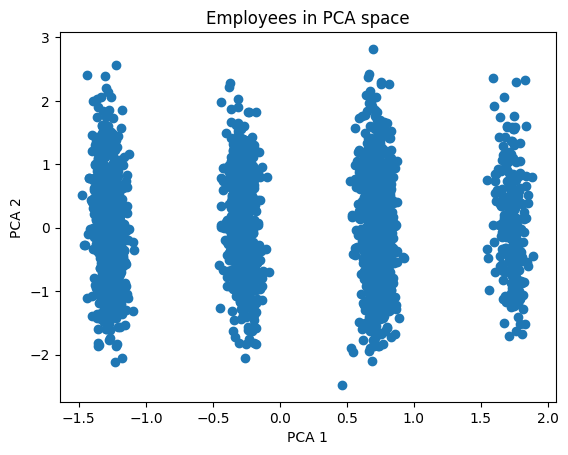

In [31]:
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Employees in PCA space")
plt.show()

# Clustering (K-Means)

In [32]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
df['cluster'] = kmeans.fit_predict(X_pca)

print("Number of unique clusters:", df['cluster'].nunique())
print(df['cluster'].value_counts().sort_index())

Number of unique clusters: 4
cluster
0    618
1    607
2    642
3    592
Name: count, dtype: int64


## Elbow Method

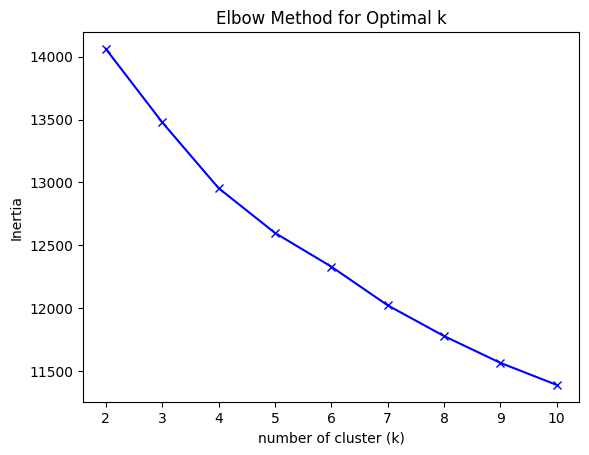

In [33]:
inertia = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel("number of cluster (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

Elbow Method
- The curve shows that after **4–5 clusters**, the improvement slows down.
- This means **4–5 clusters** is a reasonable choice for segmentation.

## Silhouette Score

k=2, Silhouette Score=0.118
k=3, Silhouette Score=0.082
k=4, Silhouette Score=0.066
k=5, Silhouette Score=0.063
k=6, Silhouette Score=0.060
k=7, Silhouette Score=0.060
k=8, Silhouette Score=0.060
k=9, Silhouette Score=0.059
k=10, Silhouette Score=0.059


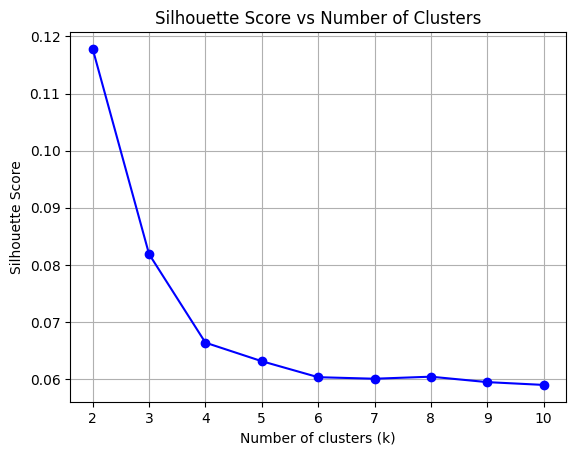

In [34]:
# Range of clusters to try
K = range(2, 11)
silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_pca)
    score = silhouette_score(X_pca, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"k={k}, Silhouette Score={score:.3f}")

# Plot silhouette scores
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.grid(True)
plt.show()

Silhouette Score
- Scores are **very low** (0.06–0.12).
- This means employees don’t form **natural, clear-cut groups**.
- Clusters overlap heavily → segmentation should be seen as **business categories**, not strict groups.

## Interpretation of Elbow Method and Silhouette Score

- Employees are not neatly divided into obvious groups.
- But we can still create **useful categories**:
  - **k = 2** → broad split (e.g., “junior vs senior” employees).
  - **k = 4–5** → more detailed profiles (different employee types). - **CHOSEN**

## Cluster 0 Employees

In [35]:
df['cluster'] = kmeans.labels_

In [36]:
df[df['cluster'] == 0].describe(include='object')

,gender,marital_status,city,education_level,department,income_class
count,273,273,273,273,273,273
unique,3,3,3,3,6,2
top,Female,Married,Bandung,SMA,Sales,High
freq,150,153,110,181,60,230


### Employee profile by most frequent
- **Gender:** Female (150 out of 273)  
- **Marital Status:** Married (153 out of 273)  
- **City:** Bandung (110 out of 273)  
- **Education Level:** SMA (181 out of 273)  
- **Department:** Sales (60 out of 273)  
- **Income Class:** High (230 out of 273)

## Cluster 1 Employees

In [37]:
df[df['cluster'] == 1].describe(include='object')

,gender,marital_status,city,education_level,department,income_class
count,201,201,201,201,201,201
unique,3,3,3,4,6,2
top,Female,Single,Jakarta,S1,HR,Low
freq,142,119,85,128,45,121


### Employee profile by most frequent
- **Gender:** Female (142 out of 201)  
- **Marital Status:** Single (119 out of 201)  
- **City:** Jakarta (85 out of 201)  
- **Education Level:** S1 (128 out of 201)  
- **Department:** HR (45 out of 201)  
- **Income Class:** Low (121 out of 201)  


## Cluster 2 Employees

In [38]:
df[df['cluster'] == 2].describe(include='object')

,gender,marital_status,city,education_level,department,income_class
count,213,213,213,213,213,213
unique,3,3,3,3,6,2
top,Male,Married,Surabaya,S1,Finance,High
freq,169,146,90,160,58,114


### Employee profile by most frequent
- **Gender:** Male (169 out of 213)  
- **Marital Status:** Married (146 out of 213)  
- **City:** Surabaya (90 out of 213)  
- **Education Level:** S1 (160 out of 213)  
- **Department:** Finance (58 out of 213)  
- **Income Class:** High (114 out of 213)  


## Cluster 3 Employees

In [39]:
df[df['cluster'] == 3].describe(include='object')

,gender,marital_status,city,education_level,department,income_class
count,214,214,214,214,214,214
unique,3,3,3,4,6,2
top,Female,Single,Surabaya,S1,Marketing,Low
freq,156,169,84,152,53,190


### Employee profile by most frequent
- **Gender:** Female (156 out of 214)  
- **Marital Status:** Single (169 out of 214)  
- **City:** Surabaya (84 out of 214)  
- **Education Level:** S1 (152 out of 214)  
- **Department:** Marketing (53 out of 214)  
- **Income Class:** Low (190 out of 214)  


# Save df with clusters to csv

In [51]:
from google.colab import files

df_cluster = df.copy()
df_cluster.to_csv('df_cluster.csv', index=False)
files.download('df_cluster.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Check 4 clusters and group by median

In [40]:
cluster_summary = df.groupby('cluster').median(numeric_only=True)
cluster_summary.head(4)

,employee_id,age,years_experience,weekly_hours,bonus_percentage,performance_score,overtime_hours,monthly_income
cluster,,,,,,,,
0,1361.0,41.0,14.0,38.9,7.30,74.30,12.8,10926.0
1,1577.0,31.0,9.0,38.8,7.90,86.60,10.8,8553.0
2,1431.0,45.0,10.0,40.6,5.00,81.10,8.8,9141.0
3,1569.5,40.0,6.0,37.2,6.25,72.55,8.6,6691.5


## Employee Cluster Interpretation

## Cluster 0
### Numeric (Median)
- **Age:** ~41  
- **Experience:** ~14 years  
- **Weekly Hours:** ~39  
- **Bonus %:** ~7.3%  
- **Performance Score:** ~74  
- **Overtime Hours:** ~12.8  
- **Monthly Income:** ~10,926  

### Categorical (Most Frequent)
- **Gender:** Female (150 out of 273)  
- **Marital Status:** Married (153 out of 273)  
- **City:** Bandung (110 out of 273)  
- **Education Level:** SMA (181 out of 273)  
- **Department:** Sales (60 out of 273)  
- **Income Class:** High (230 out of 273)  

**Interpretation:**  
Older, experienced employees with higher income, moderate performance, and steady overtime.  
*(Long-tenured staff earning well, but not top performers.)*

---

## Cluster 1
### Numeric (Median)
- **Age:** ~31  
- **Experience:** ~9 years  
- **Weekly Hours:** ~39  
- **Bonus %:** ~7.9%  
- **Performance Score:** ~87 (highest)  
- **Overtime Hours:** ~10.8  
- **Monthly Income:** ~8,553  

### Categorical (Most Frequent)
- **Gender:** Female (142 out of 201)  
- **Marital Status:** Single (119 out of 201)  
- **City:** Jakarta (85 out of 201)  
- **Education Level:** S1 (128 out of 201)  
- **Department:** HR (45 out of 201)  
- **Income Class:** Low (121 out of 201)  

**Interpretation:**  
Younger employees with strong performance and decent bonuses, but lower income.  
*(High-potential rising stars.)*

---

## Cluster 2
### Numeric (Median)
- **Age:** ~45  
- **Experience:** ~10 years  
- **Weekly Hours:** ~41  
- **Bonus %:** ~5.0% (lowest)  
- **Performance Score:** ~81  
- **Overtime Hours:** ~8.8  
- **Monthly Income:** ~9,141  

### Categorical (Most Frequent)
- **Gender:** Male (169 out of 213)  
- **Marital Status:** Married (146 out of 213)  
- **City:** Surabaya (90 out of 213)  
- **Education Level:** S1 (160 out of 213)  
- **Department:** Finance (58 out of 213)  
- **Income Class:** High (114 out of 213)  

**Interpretation:**  
Older employees with stable performance and income, but minimal bonuses.  
*(Steady workers, less incentivized.)*

---

## Cluster 3
### Numeric (Median)
- **Age:** ~40  
- **Experience:** ~6 years  
- **Weekly Hours:** ~37  
- **Bonus %:** ~6.3%  
- **Performance Score:** ~72.5 (lower)  
- **Overtime Hours:** ~8.6  
- **Monthly Income:** ~6,692 (lowest)  

### Categorical (Most Frequent)
- **Gender:** Female (156 out of 214)  
- **Marital Status:** Single (169 out of 214)  
- **City:** Surabaya (84 out of 214)  
- **Education Level:** S1 (152 out of 214)  
- **Department:** Marketing (53 out of 214)  
- **Income Class:** Low (190 out of 214)  

**Interpretation:**  
Mid-age employees with less experience, lower pay, and weaker performance.  
*(Underperforming or plateaued staff.)*


## Visualize clusters for further analysis

### Monthly Income by Cluster

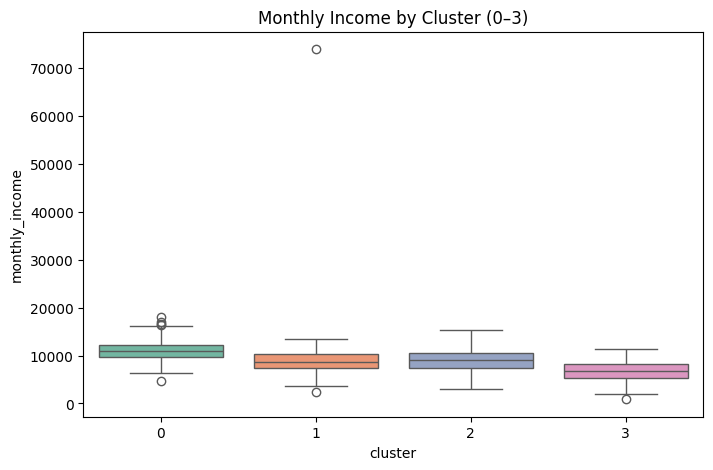

In [46]:
# Monthly Income by Cluster
plt.figure(figsize=(8,5))
sns.boxplot(x='cluster', y='monthly_income', data=df[df['cluster'].isin([0,1,2,3])], palette="Set2")
plt.title("Monthly Income by Cluster (0–3)")
plt.show()

**Insights:**

Cluster 0
- Highest typical (median) monthly income compared to other clusters.  
- Wider spread, with multiple outliers on the higher side.  
- Represents **high earners with significant income variability**.  

Cluster 1
- Median income is lower than Cluster 0.  
- Presence of a **very high outlier (~75,000)** that skews the range.  
- Overall, a **mid-income group with occasional extreme earners**.  

Cluster 2
- Moderate median income, higher than Cluster 3 but lower than Cluster 0.  
- Distribution is relatively stable without extreme variation.  
- Represents a **stable middle-income group**.  

Cluster 3
- Lowest median income across all clusters.  
- Narrow spread, most employees concentrated in the lower-income range.  
- Represents **consistent but lower-income earners**.  

### Performance Score by Cluster

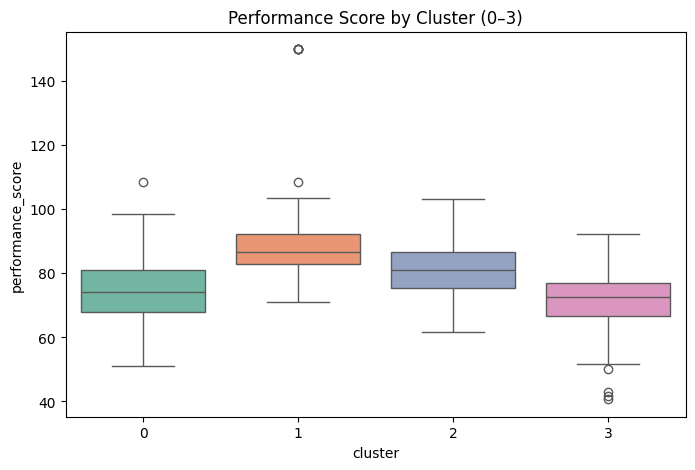

In [47]:
plt.figure(figsize=(8,5))
sns.boxplot(x='cluster', y='performance_score', data=df[df['cluster'].isin([0,1,2,3])], palette="Set2")
plt.title("Performance Score by Cluster (0–3)")
plt.show()

**Insights:**

Cluster 0
- Lower median performance compared to other clusters.  
- Wider spread, with multiple outliers on the higher side.  
- Represents **mixed performers with mostly average results and a few high outliers**.  

Cluster 1
- Highest typical (median) performance score compared to other clusters.  
- Presence of a **very high outlier (~150)** that skews the range.  
- Represents **strong performers with occasional exceptional cases**.  

Cluster 2
- Moderate median performance, higher than Cluster 0 and 3 but lower than Cluster 1.  
- Distribution is relatively stable without extreme variation.  
- Represents a **stable above-average performing group**.  

Cluster 3
- Lowest median performance across all clusters.  
- Narrower spread with some low outliers (~40).  
- Represents **weaker performers with consistency issues**.  


### Overtime Hours by Cluster

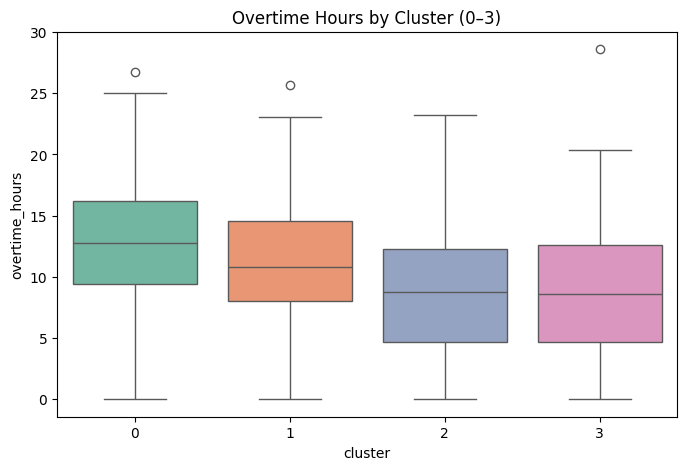

In [48]:
plt.figure(figsize=(8,5))
sns.boxplot(x='cluster', y='overtime_hours', data=df[df['cluster'].isin([0,1,2,3])], palette="Set2")
plt.title("Overtime Hours by Cluster (0–3)")
plt.show()

**Insights:**

Cluster 0
- Highest median overtime hours compared to other clusters.  
- Wider spread, with several employees logging very high overtime (~25–27 hours).  
- Represents **hard-working employees with consistently longer overtime**.  

Cluster 1
- Moderate median overtime hours, lower than Cluster 0 but still relatively high.  
- Contains some extreme overtime outliers (~26 hours).  
- Represents **employees with steady overtime, some going beyond the norm**.  

Cluster 2
- Lower median overtime compared to Cluster 0 and 1.  
- Narrower spread, though still includes employees with up to ~23 hours overtime.  
- Represents **employees with moderate overtime commitments**.  

Cluster 3
- Lowest median overtime among all clusters.  
- Distribution is tighter, though a few outliers reach ~29 hours.  
- Represents **employees with generally lighter overtime workloads**.  


# Recommendations Based on Clustering Insights

## Cluster 0 – High Earners with Overtime Commitment
**Profile:** Older, experienced employees with the highest incomes, longer overtime, but only moderate performance.  
**Risks:** Burnout risk due to high overtime, possible stagnation in performance.  

**Recommendations:**
- Introduce **work-life balance programs** to reduce overtime without hurting productivity.  
- Provide **continuous training or skill-refresh programs** to boost performance consistency.  
- Recognize contributions with **non-monetary rewards** (mentorship roles, leadership opportunities).  

---

## Cluster 1 – Young High Performers
**Profile:** Younger employees with the highest performance scores, moderate income, and steady overtime.  
**Risks:** Risk of attrition if compensation and career growth don’t match contributions.  

**Recommendations:**
- Implement **career development pathways** (fast-track promotions, leadership training).  
- Offer **performance-based bonuses or incentives** to retain talent.  
- Encourage **knowledge-sharing initiatives**, positioning them as role models for peers.  

---

## Cluster 2 – Steady Mid-Level Employees
**Profile:** Older employees with stable performance and income, but low bonus percentages and moderate overtime.  
**Risks:** Lack of motivation due to limited bonuses; potential disengagement.  

**Recommendations:**
- Review **bonus allocation policies** to fairly reward steady contributors.  
- Encourage involvement in **team projects or cross-department initiatives** to keep engagement high.  
- Provide **upskilling programs** (digital tools, process improvements) to improve efficiency.  

---

## Cluster 3 – Low-Income, Weaker Performers
**Profile:** Mid-aged employees with the lowest income, lowest performance, and light overtime.  
**Risks:** Low motivation, possible underutilization, and performance consistency issues.  

**Recommendations:**
- Implement **targeted training and mentoring** to improve skills and performance.  
- Re-evaluate workload and responsibilities — some may be underutilized.  
- Introduce **clear performance improvement plans (PIP)** with structured feedback.  
- Explore opportunities to **rotate roles or departments** to find better fit and engagement.  

---

# Strategic Actions Across All Clusters
1. **Retention Strategy:** Focus on **Cluster 1 (young high performers)** to reduce turnover risk.  
2. **Performance Boost:** Invest in **Clusters 0 & 3** through tailored training and workload balancing.  
3. **Compensation Review:** Adjust **bonuses for Cluster 2** and ensure fairness across groups.  
4. **Well-being Programs:** Reduce excessive overtime (**Cluster 0**) while motivating low overtime workers (**Cluster 3**).  

---

**Bottom Line:**  
Each cluster represents a different employee segment with unique needs. By tailoring **HR policies, training, bonuses, and career development** to these groups, the company can **improve performance, retention, and engagement** while maintaining fairness and productivity.
